In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 10.2MB/s 
     |████████████████████████████████| 2.1MB 54.7MB/s 
     |████████████████████████████████| 8.7MB 54.1MB/s 
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import plotly.express as px 
import pandas as pd 
import numpy as np 
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
import datetime
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook
from sklearn import svm
import itertools 

import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import pmdarima as pm

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

from __future__ import absolute_import,division,print_function,unicode_literals

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

import pandas as pd


mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

from statsmodels.tsa import stattools
from statsmodels.tsa import seasonal
from sklearn.linear_model import Ridge

from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.ensemble import StackingRegressor
import pickle
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

print("Import Succesfull")

Import Succesfull


In [ ]:
# Get some data
df = pd.read_excel(("/content/drive/My Drive/Capstone_Commodity_SureshaHP/Onion/Onion_24Aug.xlsx"),index=False,axis=1)

In [ ]:
df.head()

,Date,Bengaluru_RetailPrice,Bengaluru_Volume,DieselPrice
0,2015-01-01,2791.0,74978.0,53.74
1,2015-02-01,2750.0,42164.0,51.96
2,2015-03-01,2396.0,41339.0,55.41
3,2015-04-01,2260.0,43534.0,52.56
4,2015-05-01,2458.0,44227.0,58.19


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   67 non-null     datetime64[ns]
 1   Bengaluru_RetailPrice  67 non-null     float64       
 2   Bengaluru_Volume       67 non-null     float64       
 3   DieselPrice            67 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.2 KB


#  Prediction Models

In [ ]:
print(df.index)

RangeIndex(start=0, stop=67, step=1)


In [ ]:
datetime_series = pd.to_datetime(df['Date'])

# create datetime index passing the datetime series
datetime_index = pd.DatetimeIndex(datetime_series.values)

df5=df.set_index(datetime_index)

# we don't need the column anymore
df5.drop('Date',axis=1,inplace=True)

print(df5.index)

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
      

In [ ]:
col = ['Bengaluru_RetailPrice','Bengaluru_Volume','DieselPrice']
df5 = df5[col]
df5.head()

,Bengaluru_RetailPrice,Bengaluru_Volume,DieselPrice
2015-01-01,2791.0,74978.0,53.74
2015-02-01,2750.0,42164.0,51.96
2015-03-01,2396.0,41339.0,55.41
2015-04-01,2260.0,43534.0,52.56
2015-05-01,2458.0,44227.0,58.19


In [ ]:
from sklearn.model_selection import train_test_split

X = df5.drop(['Bengaluru_RetailPrice'], axis=1)
#print('X columns: %s' % list(X.columns))

y = df5['Bengaluru_RetailPrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Ridge

In [ ]:
ridge_regression = Ridge()
parameters = {'alpha':[10**-5, 10**-4, 10**-3, 10**-2, 0.1, 1, 10, 10**2, 10**3, 10**4, 10**5]}
tscv = TimeSeriesSplit(n_splits=3)
clf = GridSearchCV(ridge_regression, parameters, cv=tscv, scoring='neg_mean_squared_error', verbose = 2, return_train_score=True, n_jobs = -1)
clf.fit(X_train, np.log1p(y_train))

results = pd.DataFrame.from_dict(clf.cv_results_)

Fitting 3 folds for each of 11 candidates, totalling 33 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    1.2s finished


In [ ]:
train_score= results['mean_train_score']
train_score_std= results['std_train_score']
cv_score = results['mean_test_score'] 
cv_score_std= results['std_test_score']
param_alpha = results['param_alpha']
results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.009893,0.008702,0.001168,0.000098,1e-05,{'alpha': 1e-05},-0.528991,-0.091365,-0.301394,-0.307250,0.178708,1,-0.097764,-0.188738,-0.154757,-0.147086,0.037534
1,0.002565,0.000117,0.000974,0.000016,0.0001,{'alpha': 0.0001},-0.528991,-0.091365,-0.301394,-0.307250,0.178708,2,-0.097764,-0.188738,-0.154757,-0.147086,0.037534
2,0.002778,0.000094,0.001059,0.000023,0.001,{'alpha': 0.001},-0.528992,-0.091365,-0.301394,-0.307250,0.178709,3,-0.097764,-0.188738,-0.154757,-0.147086,0.037534
3,0.004126,0.002099,0.001043,0.000018,0.01,{'alpha': 0.01},-0.529001,-0.091365,-0.301394,-0.307254,0.178712,4,-0.097764,-0.188738,-0.154757,-0.147086,0.037534
4,0.002662,0.000153,0.001024,0.000067,0.1,{'alpha': 0.1},-0.529091,-0.091367,-0.301395,-0.307284,0.178749,5,-0.097764,-0.188738,-0.154757,-0.147086,0.037534


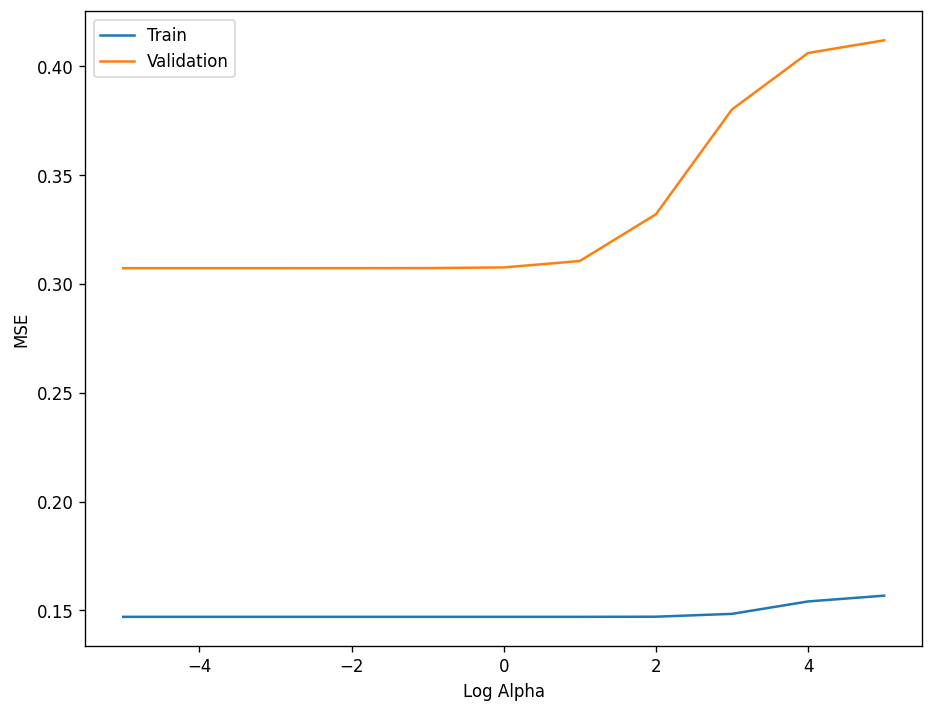

In [ ]:

plt.plot(np.log10(param_alpha.astype(float)), np.abs(train_score), label = 'Train')
plt.plot(np.log10(param_alpha.astype(float)), np.abs(cv_score), label = 'Validation')
plt.xlabel('Log Alpha')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
import sklearn

In [ ]:
import sklearn.metrics as metrics

In [ ]:
import math

In [ ]:
from math import *

In [ ]:
ridge_regression = Ridge(alpha = 100)
ridge_regression.fit(X_train, np.log1p(y_train))

y_train_pred = ridge_regression.predict(X_train) 
mse = sklearn.metrics.mean_squared_error(y_train, y_train_pred)
rmse = math.sqrt(mse)

print(rmse)

3103.5371249256104


In [ ]:
y_test_pred = ridge_regression.predict(X_test) 
mse1 = sklearn.metrics.mean_squared_error(y_test, y_test_pred)
rmse1 = math.sqrt(mse1)

print(rmse1)

2804.0798598154825


# 5. Lasso Regression

In [ ]:
lasso_regression = Lasso()
parameters2 = {'alpha':[10**-5, 10**-4, 10**-3, 10**-2, 0.1, 1, 10, 10**2, 10**3, 10**4, 10**5]}
tscv = TimeSeriesSplit(n_splits=3)
clf2 = GridSearchCV(lasso_regression, parameters2, cv=tscv, scoring='neg_mean_squared_error', verbose = 2, return_train_score=True, n_jobs = -1)
clf2.fit(X_train, np.log1p(y_train))

results1 = pd.DataFrame.from_dict(clf2.cv_results_)

Fitting 3 folds for each of 11 candidates, totalling 33 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  33 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.1s finished


In [ ]:
train_score1= results['mean_train_score']
train_score_std1= results['std_train_score']
cv_score1 = results['mean_test_score'] 
cv_score_std1= results['std_test_score']
param_alpha1 = results['param_alpha']
results1.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.003136,0.000604,0.001176,0.000378,1e-05,{'alpha': 1e-05},-0.529008,-0.091365,-0.301394,-0.307256,0.178715,4,-0.097764,-0.188738,-0.154757,-0.147086,0.037534
1,0.002420,0.000394,0.003374,0.003249,0.0001,{'alpha': 0.0001},-0.529154,-0.091369,-0.301395,-0.307306,0.178774,5,-0.097764,-0.188738,-0.154757,-0.147086,0.037534
2,0.003235,0.000841,0.001176,0.000143,0.001,{'alpha': 0.001},-0.530618,-0.091412,-0.301400,-0.307810,0.179362,6,-0.097764,-0.188738,-0.154757,-0.147086,0.037534
3,0.002810,0.000145,0.001098,0.000019,0.01,{'alpha': 0.01},-0.545547,-0.091842,-0.301451,-0.312947,0.185403,7,-0.097771,-0.188740,-0.154759,-0.147090,0.037532
4,0.002673,0.000046,0.001106,0.000018,0.1,{'alpha': 0.1},-0.722892,-0.096444,-0.302081,-0.373805,0.260727,8,-0.098462,-0.188933,-0.154918,-0.147438,0.037312


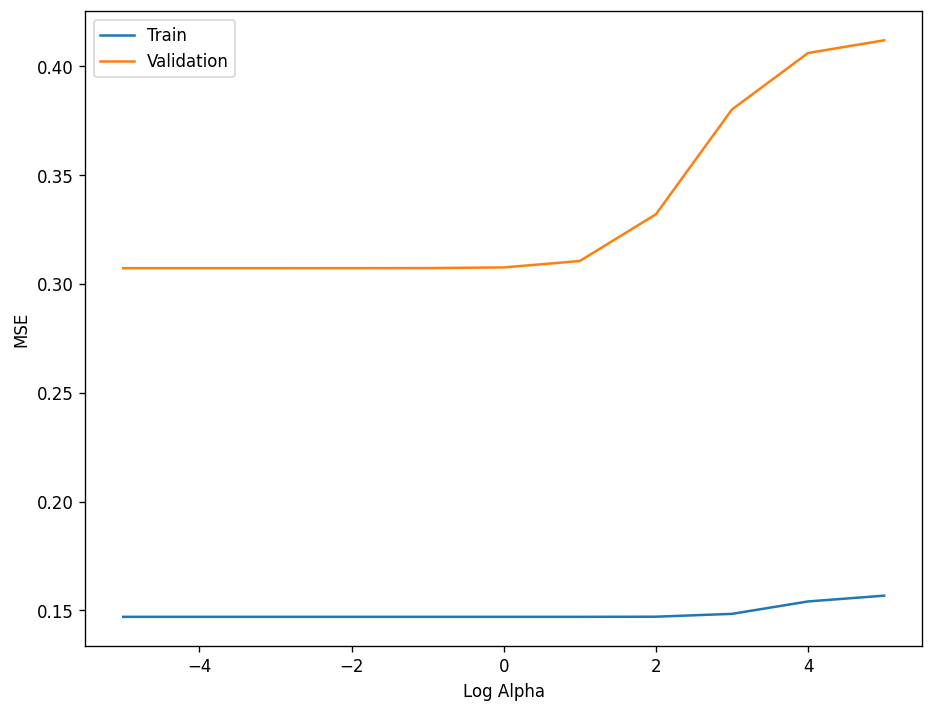

In [ ]:
plt.plot(np.log10(param_alpha1.astype(float)), np.abs(train_score1), label = 'Train')
plt.plot(np.log10(param_alpha1.astype(float)), np.abs(cv_score1), label = 'Validation')
plt.xlabel('Log Alpha')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
lasso_regression = Lasso(alpha = 0.1)
lasso_regression.fit(X_train, np.log1p(y_train))

y_train_pred2 = lasso_regression.predict(X_train)  

mse2 = sklearn.metrics.mean_squared_error(y_train, y_train_pred2)
rmse2 = math.sqrt(mse2)
print(rmse2)

3103.5377352702753


In [ ]:
y_test_pred3 = lasso_regression.predict(X_test)  

mse3 = sklearn.metrics.mean_squared_error(y_test, y_test_pred3)
rmse3 = math.sqrt(mse3)
print(rmse3)

2804.082644338316


# 7 Linear SVR

In [ ]:
svr_regression = LinearSVR()
parameters3 = {'C':[10**-4, 10**-3, 10**-2, 0.1, 1, 10, 10**2, 10**3, 10**4]}
tscv = TimeSeriesSplit(n_splits=3)
clf3 = GridSearchCV(svr_regression, parameters3, cv=tscv, scoring='neg_mean_squared_error', verbose = 2, return_train_score=True, n_jobs = -1)
clf3.fit(X_train, np.log1p(y_train))

results3 = pd.DataFrame.from_dict(clf3.cv_results_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished


In [ ]:
train_score_std3= results3['std_train_score']
cv_score3 = results3['mean_test_score'] 
cv_score_std3= results3['std_test_score']
param_C3 = results3['param_C']
results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.009893,0.008702,0.001168,0.000098,1e-05,{'alpha': 1e-05},-0.528991,-0.091365,-0.301394,-0.307250,0.178708,1,-0.097764,-0.188738,-0.154757,-0.147086,0.037534
1,0.002565,0.000117,0.000974,0.000016,0.0001,{'alpha': 0.0001},-0.528991,-0.091365,-0.301394,-0.307250,0.178708,2,-0.097764,-0.188738,-0.154757,-0.147086,0.037534
2,0.002778,0.000094,0.001059,0.000023,0.001,{'alpha': 0.001},-0.528992,-0.091365,-0.301394,-0.307250,0.178709,3,-0.097764,-0.188738,-0.154757,-0.147086,0.037534
3,0.004126,0.002099,0.001043,0.000018,0.01,{'alpha': 0.01},-0.529001,-0.091365,-0.301394,-0.307254,0.178712,4,-0.097764,-0.188738,-0.154757,-0.147086,0.037534
4,0.002662,0.000153,0.001024,0.000067,0.1,{'alpha': 0.1},-0.529091,-0.091367,-0.301395,-0.307284,0.178749,5,-0.097764,-0.188738,-0.154757,-0.147086,0.037534


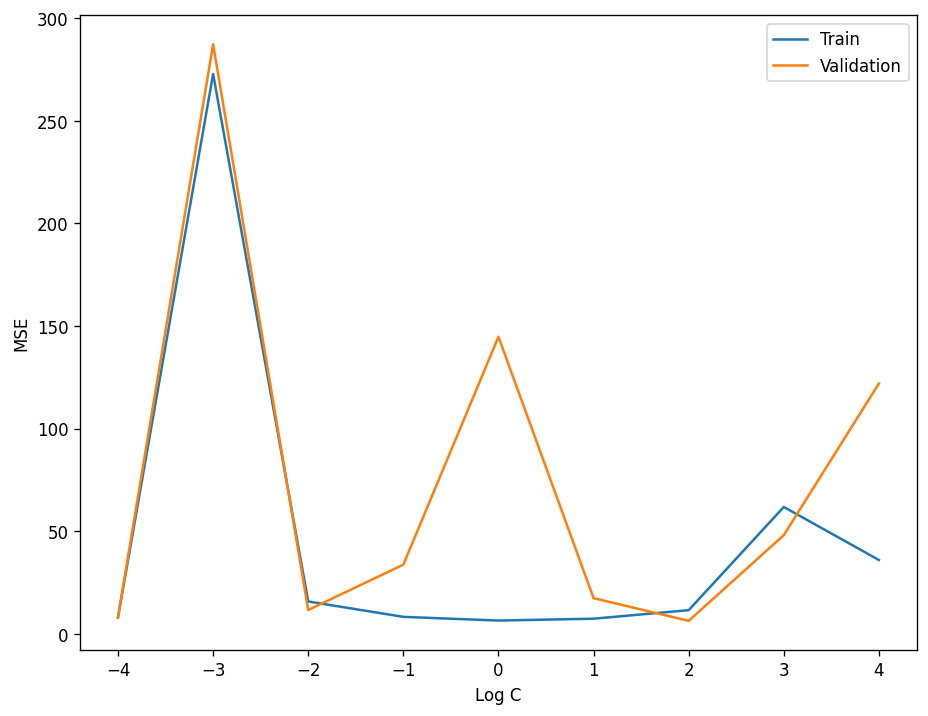

In [ ]:
plt.plot(np.log10(param_C3.astype(float)), np.abs(train_score_std3), label = 'Train')
plt.plot(np.log10(param_C3.astype(float)), np.abs(cv_score_std3), label = 'Validation')
plt.xlabel('Log C')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
svr_regression = LinearSVR(C = 0.01)
svr_regression.fit(X_train, np.log1p(y_train))

y_train_pred4 = svr_regression.predict(X_train) 

mse4 = sklearn.metrics.mean_squared_error(y_train, y_train_pred4)
rmse4 = math.sqrt(mse4)
print(rmse4)

3103.8069732254057


In [ ]:
y_test_pred5 = svr_regression.predict(X_test) 

mse5 = sklearn.metrics.mean_squared_error(y_test, y_test_pred5)
rmse5 = math.sqrt(mse5)
print(rmse5)

2805.7701496889663


# 9. Random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RForest = RandomForestRegressor()
RForest.fit(X_train,y_train)
print(RForest.score(X_train,y_train))  

0.7925266178136585


In [ ]:
y_train_pred6 = RForest.predict(X_train) 

mse6 = sklearn.metrics.mean_squared_error(y_train, y_train_pred6)
rmse6 = math.sqrt(mse6)
print(rmse6)

762.9707402980993


In [ ]:
y_test_pred7 = RForest.predict(X_test) 

mse7 = sklearn.metrics.mean_squared_error(y_test, y_test_pred7)
rmse7 = math.sqrt(mse7)
print(rmse7)

1213.8483856016096


# XGBoost regressor

In [ ]:
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
# prepare the model XGB
X_train_scaled = scaler.fit_transform(X_train)
print(X_train_scaled)

[[0.16625855 0.26162199]
 [0.19099087 0.42925008]
 [0.23491606 0.64200882]
 [0.19074537 0.70410587]
 [0.24719094 0.37597557]
 [0.08172553 0.31523583]
 [0.23188825 0.69528334]
 [0.04466169 0.10553105]
 [0.18443797 0.35595521]
 [0.05183148 0.0844927 ]
 [0.2479989  0.58296573]
 [0.25375643 0.7804547 ]
 [0.24212991 0.69460468]
 [0.06800914 0.3413641 ]
 [0.19802847 0.66677978]
 [0.22266636 0.6935867 ]
 [0.78231284 0.69799796]
 [0.5272345  0.4414659 ]
 [0.         0.85748219]
 [0.13030889 0.46759416]
 [1.         0.05293519]
 [0.39398594 0.18357652]
 [0.23905804 0.6128266 ]
 [0.09052568 0.31252121]
 [0.03974544 0.0458093 ]
 [0.34204745 0.7502545 ]
 [0.2944272  0.81099423]
 [0.62700096 0.        ]
 [0.77022051 1.        ]
 [0.04860853 0.28775025]
 [0.04821825 0.11129963]
 [0.29230585 0.64913471]
 [0.17145177 0.14455378]
 [0.19532799 0.19239905]
 [0.04002241 0.31421785]
 [0.25684089 0.77706142]
 [0.18598649 0.77434679]
 [0.24420091 0.60807601]
 [0.2431182  0.38853071]
 [0.21612605 0.42416016]


In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
max_depth = 5, alpha = 10, n_estimators = 100)
xg_reg.fit(X_train_scaled, y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
train_pred=xg_reg.predict(X_train_scaled)
rmseXG=np.sqrt(mean_squared_error(y_train,train_pred))
print("RMSE_train_XG:%f" % (rmseXG))

RMSE_train_XG:89.719534


In [ ]:
X_test_scaled =scaler.transform(X_test)
test_pred = xg_reg.predict(X_test_scaled)
rmsetestXG=np.sqrt(mean_squared_error(y_test,test_pred))
print("RMSE_train_XG:%f" % (rmsetestXG))

RMSE_train_XG:1232.725171
